In [ ]:
# Visualize mobility matrices more easily

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import adjustText as aT
import seaborn as sns
sns.set(style="darkgrid")

In [58]:
from os.path import isfile, join
path = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/preprocessed/mobility/New Files/'
path_output = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/output/'

In [60]:
daily_i5= pd.read_csv(path+'daily_region_transition_probability-new-district-pre-lockdown_i5.csv')
daily_i5.set_index('weekday', inplace=True)
daily_i5.tail()

,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
weekday,,,,,,,,,,,,,,,,,,,,,
2,d_9,0.0,1.0532,1.0783,1.0935,1.0935,3.9845,5.5177,14.6091,97.240700,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100
3,d_9,0.0,0.8631,0.8744,0.8822,0.8822,3.5311,4.8823,13.6231,97.732002,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100
4,d_9,0.0,0.9162,0.9506,0.9723,0.9723,3.9107,5.4651,14.0538,97.530197,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100
5,d_9,0.0,1.1153,1.1754,1.2242,1.2242,4.6180,6.5346,15.2039,97.082603,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100
6,d_9,0.0,1.0852,1.1209,1.1539,1.1772,4.4371,6.2229,14.9539,97.155502,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100


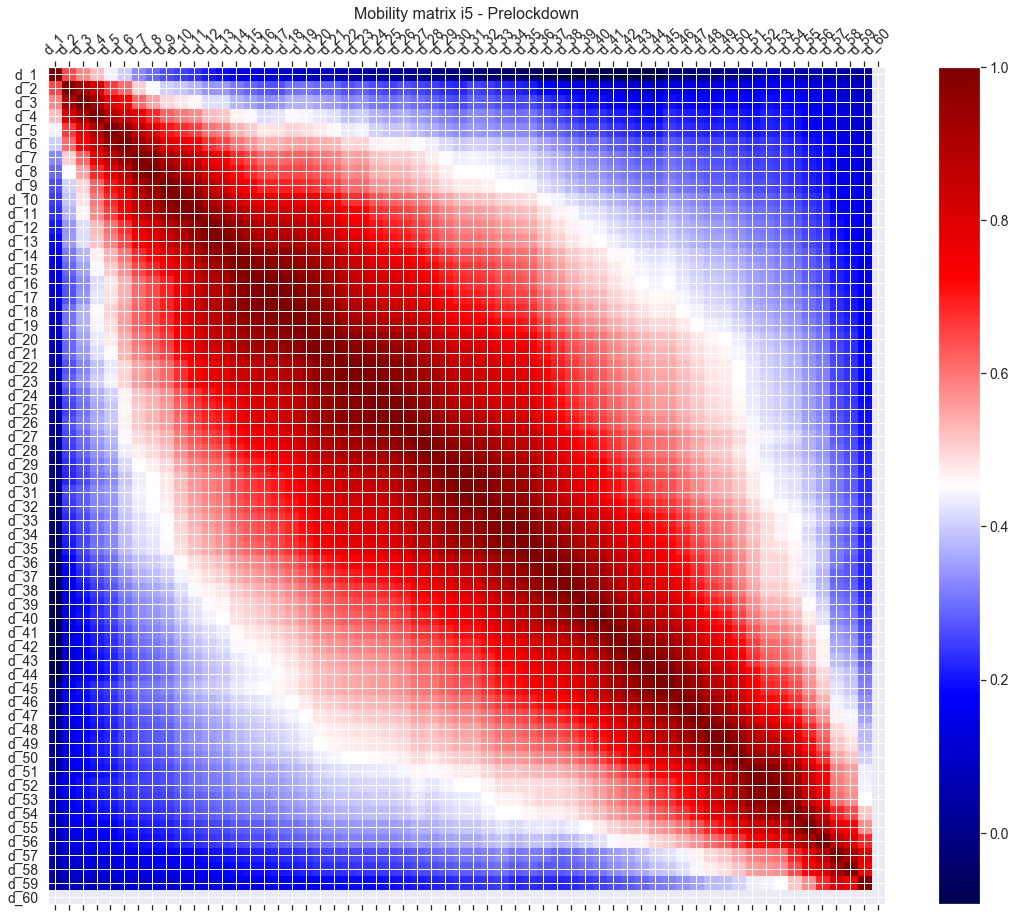

In [84]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daily_i5.corr(), fignum=f.number)

plt.xticks(range(daily_i5.select_dtypes(['number']).shape[1]), daily_i5.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(daily_i5.select_dtypes(['number']).shape[1]), daily_i5.select_dtypes(['number']).columns, fontsize=14)
plt.set_cmap("seismic")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Mobility matrix i5 - Prelockdown', fontsize=16);
plt.savefig(path_output+'plots/corr_matrix_i5_nld.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [68]:
daily_i5_ld= pd.read_csv(path+'daily_region_transition_probability-new-district-post-lockdown_i5.csv')
daily_i5_ld.set_index('weekday', inplace=True)
daily_i5_ld.head()

,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
weekday,,,,,,,,,,,,,,,,,,,,,
0,d_1,92.014503,92.070297,92.070297,92.070297,92.070297,92.070297,92.070297,92.070297,92.070297,...,99.229797,99.795502,99.803802,99.803802,99.803802,99.917503,99.964104,99.974503,99.976196,100
1,d_1,91.739899,91.789803,91.789803,91.789803,91.789803,91.789803,91.789803,91.789803,91.789803,...,99.056198,99.781700,99.789101,99.789101,99.789101,99.906898,99.955803,99.969200,99.974403,100
2,d_1,91.582298,91.625099,91.626801,91.626801,91.626801,91.626801,91.626801,91.626801,91.626801,...,99.021500,99.762001,99.774300,99.774300,99.776100,99.900497,99.947197,99.961304,99.966003,100
3,d_1,91.617798,91.667702,91.670502,91.670502,91.670502,91.670502,91.670502,91.670502,91.670502,...,99.044998,99.748497,99.759300,99.759300,99.760696,99.893799,99.947601,99.962700,99.969002,100
4,d_1,91.706703,91.761299,91.762802,91.762802,91.762802,91.762802,91.762802,91.762802,91.762802,...,99.064796,99.743797,99.755699,99.755699,99.755699,99.893997,99.950401,99.963997,99.969498,100


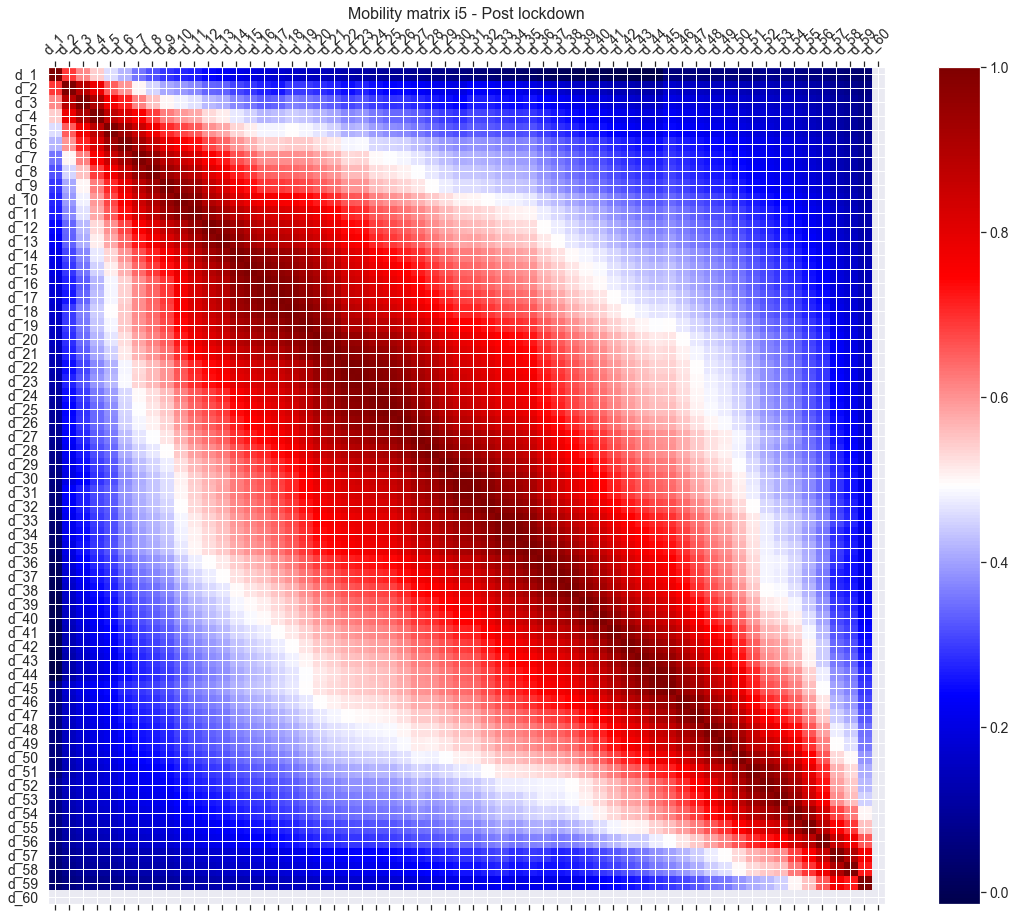

In [70]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daily_i5_ld.corr(), fignum=f.number)

plt.xticks(range(daily_i5_ld.select_dtypes(['number']).shape[1]), daily_i5_ld.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(daily_i5_ld.select_dtypes(['number']).shape[1]), daily_i5_ld.select_dtypes(['number']).columns, fontsize=14)
plt.set_cmap("seismic")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Mobility matrix i5 - Post lockdown', fontsize=16);
plt.savefig(path_output+'plots/corr_matrix_i5_ld.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [40]:
daily_i9= pd.read_csv(path+'daily_region_transition_probability-new-district-pre-lockdown_i9.csv')
daily_i9.set_index('weekday', inplace=True)
daily_i9.head()

,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
weekday,,,,,,,,,,,,,,,,,,,,,
0,d_1,95.076202,95.484001,95.504097,95.509003,95.518700,95.533096,95.570602,95.577499,95.581001,...,99.098297,99.468697,99.491501,99.504204,99.540703,99.778702,99.876701,99.908798,99.936302,100
1,d_1,95.245598,95.661301,95.677902,95.683998,95.693802,95.706703,95.748703,95.755096,95.755096,...,99.222900,99.548599,99.565598,99.579498,99.617401,99.787498,99.876602,99.908401,99.940102,100
2,d_1,95.488297,95.819099,95.836197,95.839500,95.846901,95.855301,95.899399,95.901802,95.902901,...,99.306198,99.615997,99.628502,99.639702,99.666801,99.813797,99.892197,99.920303,99.947899,100
3,d_1,95.805199,96.067497,96.078499,96.078499,96.083000,96.087303,96.117798,96.117798,96.117798,...,99.350403,99.665298,99.677101,99.685501,99.706902,99.844902,99.907700,99.931801,99.954002,100
4,d_1,96.262901,96.502098,96.512100,96.512100,96.513397,96.517403,96.542198,96.542198,96.542198,...,99.392899,99.685204,99.695198,99.705200,99.725403,99.863800,99.922302,99.943001,99.959503,100


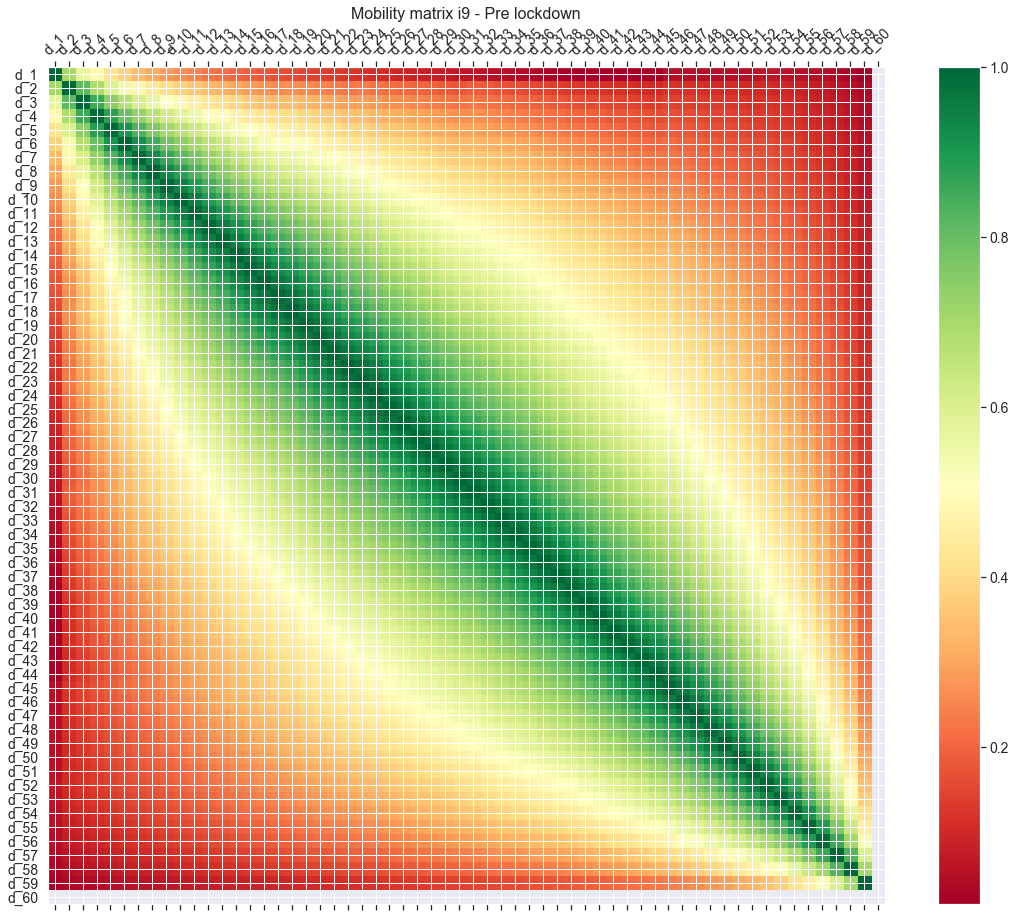

In [87]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daily_i9.corr(), fignum=f.number)

plt.xticks(range(daily_i9.select_dtypes(['number']).shape[1]), daily_i9.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(daily_i9.select_dtypes(['number']).shape[1]), daily_i9.select_dtypes(['number']).columns, fontsize=14)
plt.set_cmap("RdYlGn")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Mobility matrix i9 - Pre lockdown', fontsize=16);
plt.savefig(path_output+'plots/corr_matrix_i9.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [88]:
daily_i9_ld= pd.read_csv(path+'daily_region_transition_probability-new-district-post-lockdown_i9.csv')
daily_i9_ld.set_index('weekday', inplace=True)
daily_i9_ld.head()

,home_region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
weekday,,,,,,,,,,,,,,,,,,,,,
0,d_1,97.645203,97.703697,97.706299,97.706299,97.706299,97.706299,97.710197,97.710197,97.710197,...,99.723801,99.877296,99.879303,99.881699,99.888199,99.940697,99.964500,99.976402,99.984497,100
1,d_1,97.874100,97.942398,97.942398,97.942398,97.944504,97.944504,97.950897,97.950897,97.950897,...,99.726700,99.882202,99.888603,99.888603,99.895798,99.942596,99.964798,99.974602,99.983902,100
2,d_1,98.143501,98.192596,98.194603,98.194603,98.196701,98.196701,98.198799,98.198799,98.198799,...,99.784500,99.914902,99.919403,99.919403,99.925400,99.958900,99.976997,99.981796,99.987503,100
3,d_1,98.232597,98.270699,98.270699,98.270699,98.270699,98.270699,98.274399,98.274399,98.274399,...,99.820396,99.933899,99.933899,99.933899,99.935402,99.969498,99.983200,99.986900,99.988800,100
4,d_1,97.849998,97.881203,97.883003,97.883003,97.883003,97.883003,97.888100,97.888100,97.888100,...,99.794800,99.927696,99.929100,99.929100,99.930496,99.966599,99.984596,99.986099,99.989403,100


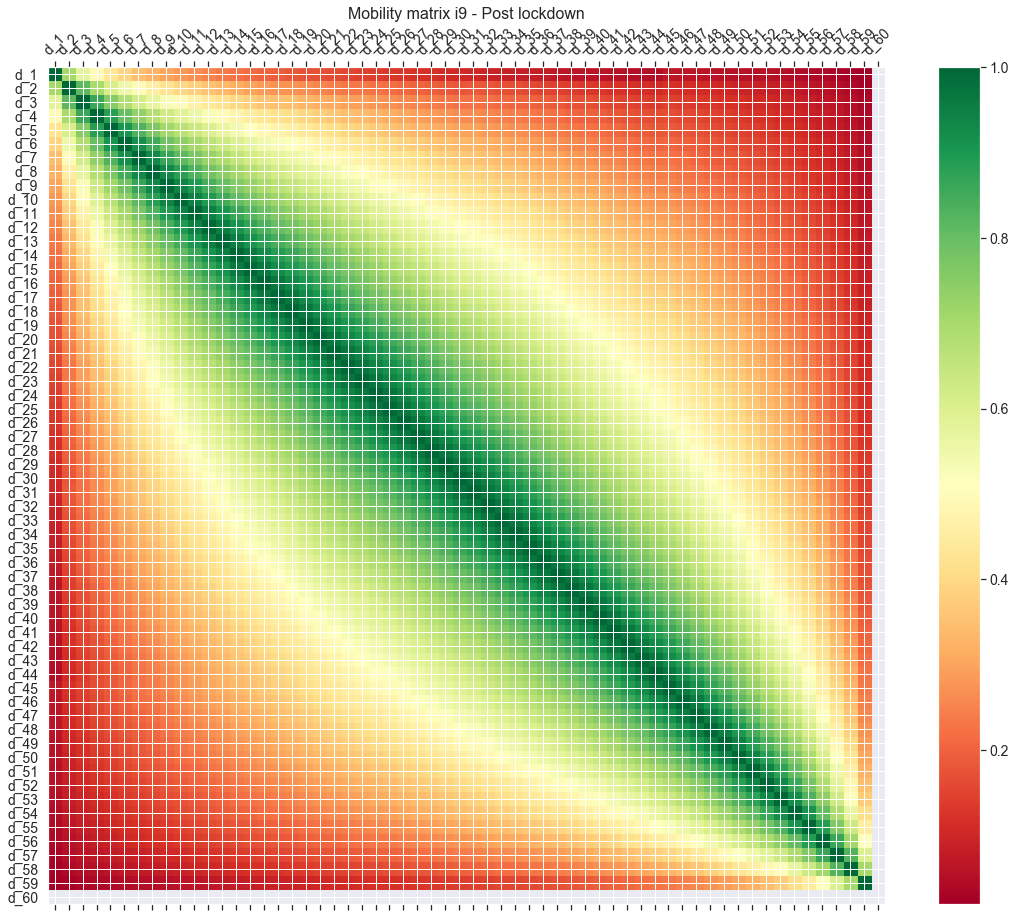

In [89]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daily_i9_ld.corr(), fignum=f.number)

plt.xticks(range(daily_i9_ld.select_dtypes(['number']).shape[1]), daily_i9_ld.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(daily_i9_ld.select_dtypes(['number']).shape[1]), daily_i9_ld.select_dtypes(['number']).columns, fontsize=14)
plt.set_cmap("RdYlGn")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Mobility matrix i9 - Post lockdown', fontsize=16);
plt.savefig(path_output+'plots/corr_matrix_i9_ld.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [ ]:
## Subset the higher mobility districts
